In [ ]:
# Supermarket Sales Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# loading dataset

datapath = '../datasets/supermarket_sales - Sheet1.csv'
sales_df = pd.read_csv(datapath)
sales_df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Exploring datasets

In [6]:
# information about datasets
sales_df.shape


(1000, 17)

In [ ]:
# checking for null values in the sales
sales_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [26]:
sales_df.tail()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [12]:
# displaying dataset information

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [18]:
sales_df["Branch"]

0      A
1      C
2      A
3      A
4      A
      ..
995    C
996    B
997    A
998    A
999    A
Name: Branch, Length: 1000, dtype: object

In [ ]:
# viewing only 3 particular columns from the datasets
sales_df[["Branch", "City", "Customer type"]]


,Branch,City,Customer type
0,A,Yangon,Member
1,C,Naypyitaw,Normal
2,A,Yangon,Normal
3,A,Yangon,Member
4,A,Yangon,Normal
...,...,...,...
995,C,Naypyitaw,Normal
996,B,Mandalay,Normal
997,A,Yangon,Member
998,A,Yangon,Normal


In [ ]:
# description of the dataset
sales_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [29]:
# checking data shape and types
print(sales_df.shape)
print(sales_df.dtypes)

(1000, 17)
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [32]:
# summary of gross income (Statistics)
sales_df["gross income"].describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: gross income, dtype: float64

In [ ]:
# checking for duplicates (what does print help in such cases)
print(sales_df.duplicated().sum())


0


In [37]:
# shows different types of customers list
sales_df["Customer type"].value_counts()
sales_df["Branch"].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [40]:
sales_df["gross income"].value_counts()

gross income
10.3635    2
39.4800    2
12.5700    2
10.3260    2
13.1880    2
          ..
2.0175     1
48.6900    1
1.5920     1
3.2910     1
3.8200     1
Name: count, Length: 990, dtype: int64

In [42]:
sales_df[["Branch","gross income"]] 

,Branch,gross income
0,A,26.1415
1,C,3.8200
2,A,16.2155
3,A,23.2880
4,A,30.2085
...,...,...
995,C,2.0175
996,B,48.6900
997,A,1.5920
998,A,3.2910


# Data Visualization

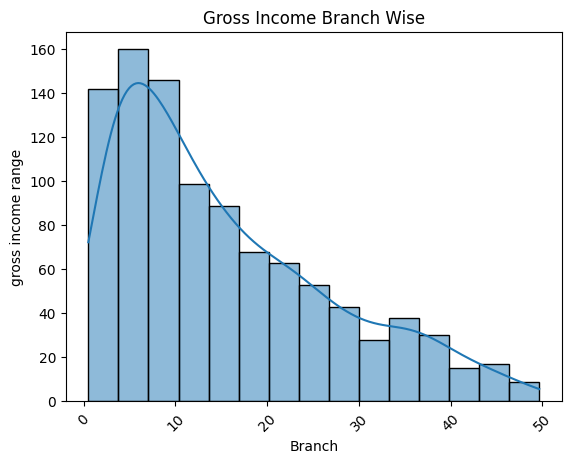

In [51]:
sns.histplot(sales_df["gross income"], kde= True)

#Labels
plt.xlabel("Branch")
plt.ylabel("gross income range")
plt.title("Gross Income Branch Wise")
plt.xticks(rotation=45)

plt.show()

In [ ]:
# pie chart based on branch
branch_counts = sales_df["Branch"].value_counts()
branch_counts

Branch
A    340
B    332
C    328
Name: count, dtype: int64

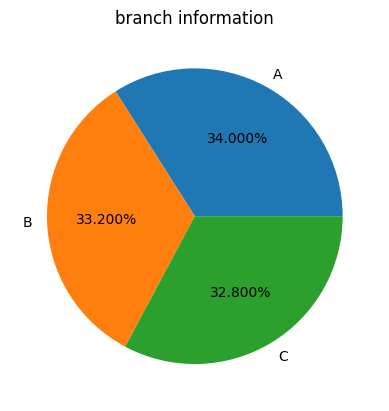

In [46]:
plt.pie(branch_counts, labels=branch_counts.index, autopct='%1.3f%%')
plt.title("branch information")
plt.show()